# Students : Hazim Benslimane, Christopher Jabea, Dylan Rachwal, Alexandre Thouvenot 

## Project of Machine learning for classification on the 2 datasets Banknote Authentication and Chronic Kidney Disease

In [17]:
%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from functions import *


mpl.style.use("ggplot")

Populating the interactive namespace from numpy and matplotlib


In [18]:
X,Y,class_labels = load_data("data_banknote_authentication.txt", False)
print(X)
print(Y)

       3.6216    8.6661  -2.8073  -0.44699
0     4.54590   8.16740  -2.4586  -1.46210
1     3.86600  -2.63830   1.9242   0.10645
2     3.45660   9.52280  -4.0112  -3.59440
3     0.32924  -4.45520   4.5718  -0.98880
4     4.36840   9.67180  -3.9606  -3.16250
...       ...       ...      ...       ...
1366  0.40614   1.34920  -1.4501  -0.55949
1367 -1.38870  -4.87730   6.4774   0.34179
1368 -3.75030 -13.45860  17.5932  -2.77710
1369 -3.56370  -8.38270  12.3930  -1.28230
1370 -2.54190  -0.65804   2.6842   1.19520

[1371 rows x 4 columns]
[0 0 0 ... 1 1 1]


In [19]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 900)

In [20]:
Y_pred = predict_SVC(X_train, X_test, Y_train)

In [21]:
precisions, recalls = precision_recall_multilabels(Y_test,Y_pred[1],class_labels)
print(precisions)
print(recalls)

[[1. 1.]]
[[1. 1.]]


In [22]:
tab_log_tree = find_best_depths(X,Y,cvp=True)

Text(0, 0.5, 'Negative Log Loss')

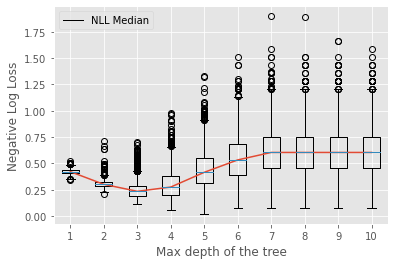

In [23]:
plt.boxplot(tab_log_tree)
plt.plot(linspace(1, 10, 10),[np.median(x) for x in tab_log_tree])
plt.legend(['NLL Median'])
xlabel('Max depth of the tree')
ylabel('Negative Log Loss')

In [22]:
class_forest = RandomForestClassifier(max_depth=3, n_estimators=1000)
class_forest.fit(X, Y)
pred_forest = class_forest.predict(X)



ValueError: could not convert string to float: 'normal'

In [24]:
X,Y,class_labels = load_data("kidney_disease.csv", True)
print(X.shape)
print(Y)

(400, 25)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [25]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 200)

In [26]:
Y_pred = predict_SVC(X_train, X_test, Y_train)

In [27]:
precisions, recalls = precision_recall_multilabels(Y_test,Y_pred[1],class_labels)
print(precisions)
print(recalls)

[[0.99236641 1.        ]]
[[1.         0.98571429]]


In [31]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([1.    , 1.    , 1.    , 0.9875, 0.9625])

In [33]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.01


In [43]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=41)
scores = cross_validate(clf, X, Y, cv = 10,  scoring=scoring)

In [45]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std()))

0.99 accuracy with a standard deviation of 0.01
